[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-510/blob/master/open-data-analysis-input.ipynb)


# 공공데이터 상권정보 분석해 보기
* https://www.data.go.kr/dataset/15012005/fileData.do
* 국가중점데이터인 상권정보를 살펴봅니다.
* 처음으로 파일데이터에서 `상가(상권)정보_의료기관_201909`를 다운로드 받아봅니다.

## 필요한 라이브러리 불러오기

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns

In [1]:
pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 294.9/294.9 kB 8.9 MB/s eta 0:00:00


## 시각화를 위한 폰트 설정

In [17]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
!pip install koreanize-matplotlib

import koreanize_matplotlib



ModuleNotFoundError: No module named 'distutils'

In [13]:
pip install undetected-chromedriver

     ---------------------------------------- 0.0/65.4 kB ? eta -:--:--
     ------------------------------------- -- 61.4/65.4 kB ? eta -:--:--
     -------------------------------------- 65.4/65.4 kB 889.8 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   - -------------------------------------- 0.4/9.5 MB 11.2 MB/s eta 0:00:01
   -- ------------------------------------- 0.6/9.5 MB 7.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/9.5 MB 7.2 MB/s eta 0:00:02
   ---- ---------------------------------

In [14]:
import koreanize_matplotlib # No module named 'distutils' <-- 이 오류 때문에 자꾸 폰트가 안불러와집니다..!

ModuleNotFoundError: No module named 'distutils'

In [10]:
import sys
sys.path

['c:\\Users\\JunQuixote\\AppData\\Local\\Programs\\Python\\Python312\\python312.zip',
 'c:\\Users\\JunQuixote\\AppData\\Local\\Programs\\Python\\Python312\\DLLs',
 'c:\\Users\\JunQuixote\\AppData\\Local\\Programs\\Python\\Python312\\Lib',
 'c:\\Users\\JunQuixote\\AppData\\Local\\Programs\\Python\\Python312',
 '',
 'C:\\Users\\JunQuixote\\AppData\\Roaming\\Python\\Python312\\site-packages',
 'C:\\Users\\JunQuixote\\AppData\\Roaming\\Python\\Python312\\site-packages\\win32',
 'C:\\Users\\JunQuixote\\AppData\\Roaming\\Python\\Python312\\site-packages\\win32\\lib',
 'C:\\Users\\JunQuixote\\AppData\\Roaming\\Python\\Python312\\site-packages\\Pythonwin',
 'c:\\Users\\JunQuixote\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages']

In [25]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
# Window 의 한글 폰트 설정
plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
# plt.rc('font', family='AppleGothic')
# plt.rc('axes', unicode_minus=False)

# 폰트가 선명하게 보이기 위해 - 그래프에 retina display 적용
set_matplotlib_formats('retina')
# retina 대신 svg 등의 설정을 할 수도 있으며
# 디스플레이(모니터)가 retina 를 지원해야만 선명한 차이를 볼 수 있습니다.
%config InlineBackend.figure_format = 'retina'

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

C:\Users\JunQuixote\AppData\Local\Temp\ipykernel_11800\1975237387.py:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


## 데이터 로드하기
* 판다스에서 데이터를 로드할 때는 read_csv를 사용합니다.
* 데이터를 로드해서 df라는 변수에 담습니다.
* 그리고 shape 를 통해 데이터의 갯수를 찍습니다. 결과는 (행, 열) 순으로 출력됩니다.

In [34]:
df = pd.read_csv("data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", encoding = 'cp949', low_memory=False)
df.shape # 항상 (행, 열) 순으로 출력됨!

(91335, 39)

In [19]:
from glob import glob

file_name = glob("data/*")[0]
file_name
glob("data/store/*_*.csv")

['data/store\\소상공인시장진흥공단_상가(상권)정보_강원_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_경기_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_경남_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_경북_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_광주_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_대구_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_대전_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_부산_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_서울_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_세종_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_울산_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_인천_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_전남_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_전북_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_제주_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_충남_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_충북_202403.csv']

In [21]:
file_csv = glob("data/store/*.csv")
file_csv

['data/store\\소상공인시장진흥공단_상가(상권)정보_강원_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_경기_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_경남_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_경북_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_광주_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_대구_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_대전_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_부산_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_서울_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_세종_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_울산_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_인천_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_전남_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_전북_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_제주_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_충남_202403.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_충북_202403.csv']

In [24]:
for file_csv_name in file_csv:
        print(file_csv_name)

data/store\소상공인시장진흥공단_상가(상권)정보_강원_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_경기_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_경남_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_경북_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_광주_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_대구_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_대전_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_부산_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_서울_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_세종_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_울산_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_인천_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_전남_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_전북_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_제주_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_충남_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_충북_202403.csv


In [29]:
import pandas as pd
file_list = []
for file_csv_name in file_csv:
        print(file_csv_name)
pd.read_csv(file_csv[0])

data/store\소상공인시장진흥공단_상가(상권)정보_강원_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_경기_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_경남_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_경북_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_광주_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_대구_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_대전_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_부산_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_서울_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_세종_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_울산_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_인천_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_전남_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_전북_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_제주_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_충남_202403.csv
data/store\소상공인시장진흥공단_상가(상권)정보_충북_202403.csv


C:\Users\JunQuixote\AppData\Local\Temp\ipykernel_22824\3852980832.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(file_csv[0])


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0084547,금강산노래광장,NaN,I2,음식,I211,주점,I21101,일반 유흥 주점,I56211,...,4217010300007470000000086,파크장,강원특별자치도 동해시 송정로 11,240806,25789,NaN,지,NaN,129.127525,37.495265
1,MA010120220805430903,엔젤,NaN,I2,음식,I201,한식,I20101,백반/한정식,I55109,...,4277032022103660000008290,NaN,강원특별자치도 정선군 남면 민둥산로 175-13,233837,26148,NaN,NaN,NaN,128.792089,37.259788
2,MA010120220805430941,누베헤어,NaN,S2,수리·개인,S207,이용·미용,S20701,미용실,S96112,...,4211012500100440010000008,춘천파크자이,강원특별자치도 춘천시 스포츠타운길 460,200200,24472,NaN,3,NaN,127.707653,37.867744
3,MA010120220805430946,공차,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,...,4213033023113500001000001,NaN,강원특별자치도 원주시 지정면 신지정로 211,220821,26354,NaN,NaN,NaN,127.872713,37.374189
4,MA010120220805431369,행운쉼터,NaN,I1,숙박,I101,일반 숙박,I10103,펜션,I55104,...,4281032022008200005013654,NaN,강원특별자치도 인제군 북면 금강로 751,252826,24609,NaN,NaN,NaN,128.207086,38.171871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95401,MA0101202310A0084366,챌린지24,NaN,M1,과학·기술,M107,본사·경영 컨설팅,M10703,경영 컨설팅업,M71531,...,4221010800106360014000001,NaN,강원특별자치도 속초시 청초호반로 117,217811,24872,NaN,1,NaN,128.581501,38.190570
95402,MA0101202310A0043532,우수에프앤비,NaN,G2,소매,G204,종합 소매,G20404,슈퍼마켓,G47121,...,4217010700100510001000001,NaN,강원특별자치도 동해시 효자남1길 7,240180,25806,NaN,2,NaN,129.109095,37.490096
95403,MA0101202310A0045843,수니복베이크샵,NaN,I2,음식,I210,기타 간이,I21001,빵/도넛,I56191,...,4213011200127850000000006,NaN,강원특별자치도 원주시 소일마을2길 60-1,220121,26509,NaN,2,NaN,127.966091,37.371090
95404,MA0101202311A0009500,어묵,NaN,I2,음식,I210,기타 간이,I21099,그 외 기타 간이 음식점,I56199,...,4211012400107360003015294,NaN,강원특별자치도 춘천시 애막골길11번길 33,200936,24323,NaN,NaN,NaN,127.752949,37.867046


In [34]:
file_list = []
for file_csv_name in file_csv:
    temp = pd.read_csv(file_csv_name, low_memory = False)
    file_list.append(temp)

KeyboardInterrupt: 

In [38]:
df = pd.concat(file_list)
df.shape

(646793, 39)

In [39]:
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0084547,금강산노래광장,NaN,I2,음식,I211,주점,I21101,일반 유흥 주점,I56211,...,4217010300007470000000086,파크장,강원특별자치도 동해시 송정로 11,240806,25789,NaN,지,NaN,129.127525,37.495265
1,MA010120220805430903,엔젤,NaN,I2,음식,I201,한식,I20101,백반/한정식,I55109,...,4277032022103660000008290,NaN,강원특별자치도 정선군 남면 민둥산로 175-13,233837,26148,NaN,NaN,NaN,128.792089,37.259788
2,MA010120220805430941,누베헤어,NaN,S2,수리·개인,S207,이용·미용,S20701,미용실,S96112,...,4211012500100440010000008,춘천파크자이,강원특별자치도 춘천시 스포츠타운길 460,200200,24472,NaN,3,NaN,127.707653,37.867744
3,MA010120220805430946,공차,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,...,4213033023113500001000001,NaN,강원특별자치도 원주시 지정면 신지정로 211,220821,26354,NaN,NaN,NaN,127.872713,37.374189
4,MA010120220805431369,행운쉼터,NaN,I1,숙박,I101,일반 숙박,I10103,펜션,I55104,...,4281032022008200005013654,NaN,강원특별자치도 인제군 북면 금강로 751,252826,24609,NaN,NaN,NaN,128.207086,38.171871


In [40]:
df.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
551382,MA0101202310A0052432,방배동할매쭈꾸미수원화서점,NaN,I2,음식,I201,한식,I20112,해산물 구이/찜,I56111,...,4111513800102440022005590,NaN,경기도 수원시 팔달구 동말로25번길 96,442151,16443,NaN,1,NaN,126.994937,37.281672
551383,MA0101202310A0052439,마상로97-14,NaN,G2,소매,G209,섬유·의복·신발 소매,G20902,여성 의류 소매업,G47412,...,4128110100105750002014126,NaN,경기도 고양시 덕양구 마상로 97-14,412811,10298,NaN,NaN,NaN,126.834809,37.661734
551384,MA0101202310A0052441,블랑,NaN,I2,음식,I210,기타 간이,I21003,피자,I56192,...,4128710300114990003007067,NaN,경기도 고양시 일산서구 현중로26번길 45-15,411841,10244,NaN,1,NaN,126.770249,37.694190
551385,MA0101202310A0057481,백년교자,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,4119010800111620002000001,제이클래스중동,경기도 부천시 원미구 석천로177번길 11,420852,14546,NaN,1,NaN,126.762047,37.503034
551386,MA0101202310A0035268,웅이네,NaN,G2,소매,G205,식료품 소매,G20506,채소/과일 소매업,G47215,...,4136025328110750000000012,신영지웰아파트,경기도 남양주시 진접읍 해밀예당3로 102,472855,12058,NaN,NaN,NaN,127.197383,37.718838


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 646793 entries, 0 to 551386
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     646793 non-null  object 
 1   상호명        646793 non-null  object 
 2   지점명        13272 non-null   object 
 3   상권업종대분류코드  646793 non-null  object 
 4   상권업종대분류명   646793 non-null  object 
 5   상권업종중분류코드  646793 non-null  object 
 6   상권업종중분류명   646793 non-null  object 
 7   상권업종소분류코드  646793 non-null  object 
 8   상권업종소분류명   646793 non-null  object 
 9   표준산업분류코드   646618 non-null  object 
 10  표준산업분류명    646618 non-null  object 
 11  시도코드       646793 non-null  int64  
 12  시도명        646793 non-null  object 
 13  시군구코드      646793 non-null  int64  
 14  시군구명       646793 non-null  object 
 15  행정동코드      646793 non-null  int64  
 16  행정동명       646793 non-null  object 
 17  법정동코드      646793 non-null  int64  
 18  법정동명       646793 non-null  object 
 19  지번코드       646793 non-null  

In [43]:
len(file_list)

2

In [30]:
pd.read_csv(file_csv[0])

C:\Users\JunQuixote\AppData\Local\Temp\ipykernel_22824\2135214103.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(file_csv[0])


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0084547,금강산노래광장,NaN,I2,음식,I211,주점,I21101,일반 유흥 주점,I56211,...,4217010300007470000000086,파크장,강원특별자치도 동해시 송정로 11,240806,25789,NaN,지,NaN,129.127525,37.495265
1,MA010120220805430903,엔젤,NaN,I2,음식,I201,한식,I20101,백반/한정식,I55109,...,4277032022103660000008290,NaN,강원특별자치도 정선군 남면 민둥산로 175-13,233837,26148,NaN,NaN,NaN,128.792089,37.259788
2,MA010120220805430941,누베헤어,NaN,S2,수리·개인,S207,이용·미용,S20701,미용실,S96112,...,4211012500100440010000008,춘천파크자이,강원특별자치도 춘천시 스포츠타운길 460,200200,24472,NaN,3,NaN,127.707653,37.867744
3,MA010120220805430946,공차,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,...,4213033023113500001000001,NaN,강원특별자치도 원주시 지정면 신지정로 211,220821,26354,NaN,NaN,NaN,127.872713,37.374189
4,MA010120220805431369,행운쉼터,NaN,I1,숙박,I101,일반 숙박,I10103,펜션,I55104,...,4281032022008200005013654,NaN,강원특별자치도 인제군 북면 금강로 751,252826,24609,NaN,NaN,NaN,128.207086,38.171871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95401,MA0101202310A0084366,챌린지24,NaN,M1,과학·기술,M107,본사·경영 컨설팅,M10703,경영 컨설팅업,M71531,...,4221010800106360014000001,NaN,강원특별자치도 속초시 청초호반로 117,217811,24872,NaN,1,NaN,128.581501,38.190570
95402,MA0101202310A0043532,우수에프앤비,NaN,G2,소매,G204,종합 소매,G20404,슈퍼마켓,G47121,...,4217010700100510001000001,NaN,강원특별자치도 동해시 효자남1길 7,240180,25806,NaN,2,NaN,129.109095,37.490096
95403,MA0101202310A0045843,수니복베이크샵,NaN,I2,음식,I210,기타 간이,I21001,빵/도넛,I56191,...,4213011200127850000000006,NaN,강원특별자치도 원주시 소일마을2길 60-1,220121,26509,NaN,2,NaN,127.966091,37.371090
95404,MA0101202311A0009500,어묵,NaN,I2,음식,I210,기타 간이,I21099,그 외 기타 간이 음식점,I56199,...,4211012400107360003015294,NaN,강원특별자치도 춘천시 애막골길11번길 33,200936,24323,NaN,NaN,NaN,127.752949,37.867046


## 데이터 미리보기
* head, tail 을 통해 데이터를 미리 볼 수 있습니다.

In [38]:
# head 로 데이터를 미리보기 합니다.
df.head(1) # shift + tab 키를 누르면 docstring(공식 문서)을 볼 수 있다!

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4.130000e+24,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344


In [47]:
# tail 로 마지막 부분에 있는 데이터를 불러옵니다.
df.tail(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4.410000e+24,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.80664


In [49]:
# sample 로 미리보기를 합니다.
df.sample()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
80172,12591104,강남비앤비의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,1.170000e+24,NaN,서울특별시 강남구 도산대로 115,135887.0,6035.0,NaN,3.0,NaN,127.021075,37.517134


## 데이터 요약하기

### 요약정보

In [50]:
# info로 데이터의 요약을 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  float64
 20  대지구분코드

### 컬럼명 보기

In [51]:
# 컬럼명만 출력해 봅니다.
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### 데이터 타입

In [58]:
# 데이터 타입만 출력합니다.
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드         float64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드        float64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호       float64
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보          float64
호정보          float64
경도           float64
위도           float64
dtype: object

## 결측치

In [61]:
null_count = df.isnull().sum() # 불리안 연산자로 계산되며 True == 1로 표기됨

<Axes: >

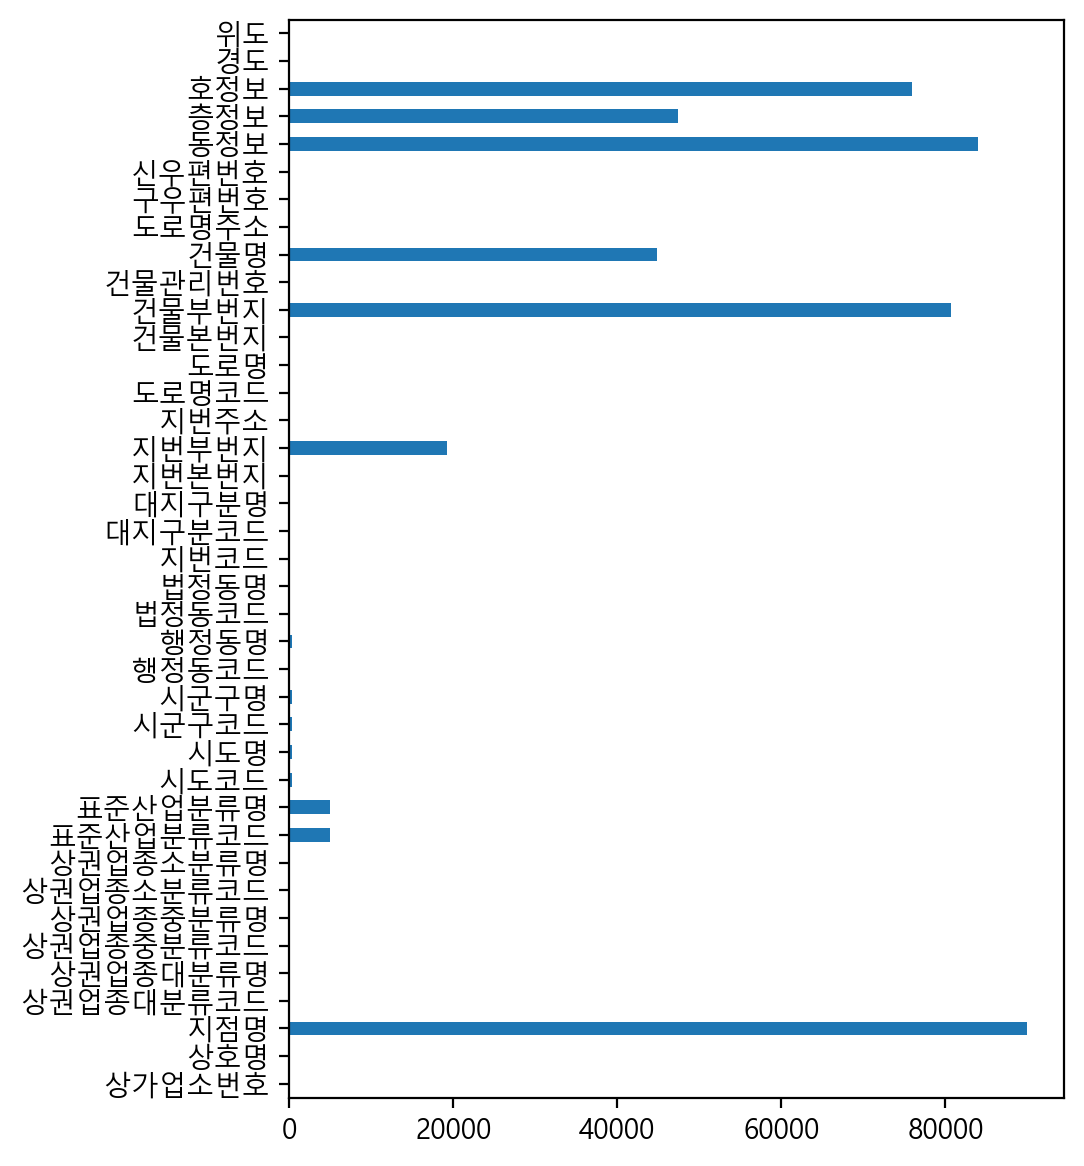

In [68]:
# 위에서 구한 결측치를 .plot.bar 를 통해 막대그래프로 표현합니다.
null_count.plot.barh(figsize=(5, 7))

In [74]:
# 위에서 계산한 결측치 수를 reset_index 를 통해 데이터프레임으로 만들어 줍니다.
# df_null_count 변수에 결과를 담아서 head 로 미리보기를 합니다.

df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## 컬럼명 변경하기

In [78]:
# df_null_count 변수에 담겨있는 컬럼의 이름을 "컬럼명", "결측치수"로 변경해 줍니다.

df_null_count.columns = ["컬럼명", "결측치수"]
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## 정렬하기

In [92]:
# df_null_count 데이터프레임에 있는 결측치수 컬럼을 sort_values 를 통해 정렬해서
# 결측치가 많은 순으로 상위 10개만 출력합니다.

df_null_count_top = df_null_count.sort_values(by="결측치수", ascending=False).head(10) # head의 기본 개수는 5개만 표시!
df_null_count_top

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75898
35,층정보,47346
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


## 특정 컬럼만 불러오기

In [89]:
# 지점명 컬럼을 불러옵니다.

df["지점명"].head() # NaN == Not a Number의 약자로 결측치를 의미함!

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [98]:
# "컬럼명" 이라는 컬럼의 값만 가져와서 drop_columns 라는 변수에 담습니다.

drop_columns = df_null_count_top["컬럼명"].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [99]:
# drop_columns 변수로 해당 컬럼 정보만 데이터프레임에서 가져옵니다.

df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4.0,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1.0,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


## 제거하기

In [103]:
print(df.shape)
df = df.drop(drop_columns, axis=1)
print(df.shape)

(91335, 39)
(91335, 29)


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  float64
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

## 기초 통계값 보기

### 기초 통계 수치

In [112]:
# 평균값
df["위도"].mean()

36.62471119236065

In [113]:
# 중앙값
df["위도"].median()

37.23465232

In [114]:
# 최댓값
df["위도"].max()

38.49965857

In [115]:
# 최솟값
df["위도"].min()

33.21928967

In [116]:
# 개수
df["위도"].count()

91335

### 기초통계값 요약하기 - describe

describe 를 사용하면 데이터를 요약해 볼 수 있습니다.
기본적으로 수치형 데이터를 요약해서 보여줍니다.
데이터의 갯수, 평균, 표준편차, 최솟값,
1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 최댓값을 볼 수 있습니다.

In [118]:
# 위도를 describe로 요약해 봅니다.

df["위도"].describe() # 50% 값이 중앙값(median)!

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [121]:
# 2개의 컬럼을 describe 로 요약합니다.

df[["위도", "경도"]].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084551
75%,37.507463,128.108919
max,38.499659,130.909912


In [127]:
# describe로 문자열 데이터타입의 요약을 봅니다.

df.describe(include="object") # top == 가장 많이 등장한 데이터

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335
unique,56908,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198


### 중복제거한 값 보기
* unique 로 중복을 제거한 값을 보고 nunique 로 갯수를 세어봅니다.

In [129]:
# "상권업종대분류명"

df["상권업종대분류명"].unique()

array(['의료'], dtype=object)

In [132]:
df["상권업종대분류명"].nunique()

1

In [134]:
# "상권업종중분류명"
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [136]:
df["상권업종중분류명"].nunique()

5

In [139]:
# "상권업종소분류명"
df["상권업종소분류명"].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [140]:
df["상권업종소분류명"].nunique()

34

In [144]:
# nunique 대신 len 을 사용할 수도 있습니다.

len(df["상권업종소분류명"].unique())

34

### 그룹화된 요약값 보기 - value_counts
* value_counts 를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있습니다.

In [145]:
# value_counts 를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있습니다.
# 시도코드를 세어봅니다.

df["시도명"].head()

0      경기도
1    서울특별시
2      경기도
3    부산광역시
4      경기도
Name: 시도명, dtype: object

In [146]:
# 시도명을 세어봅니다.

df["시도명"].value_counts()

시도명
경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: count, dtype: int64

In [148]:
# normalize=True 옵션을 사용하면 비율을 구할 수 있습니다.

city_normalize = df["시도명"].value_counts(normalize=True)

<Axes: ylabel='시도명'>

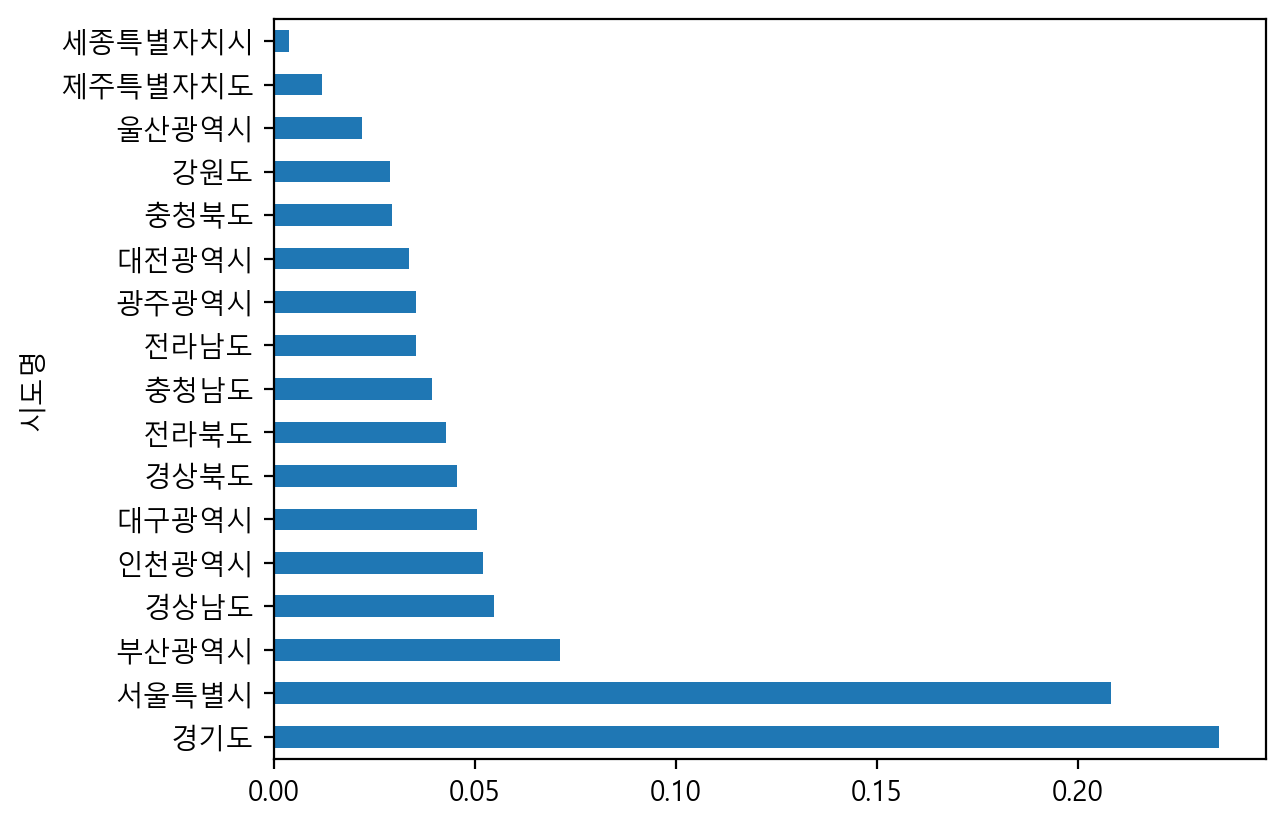

In [149]:
# Pandas 에는 plot기능을 내장하고 있습니다.
# 위에서 분석한 시도명 수를 막대그래프로 표현해 봅니다.
city_normalize.plot.barh()

<Axes: ylabel='proportion'>

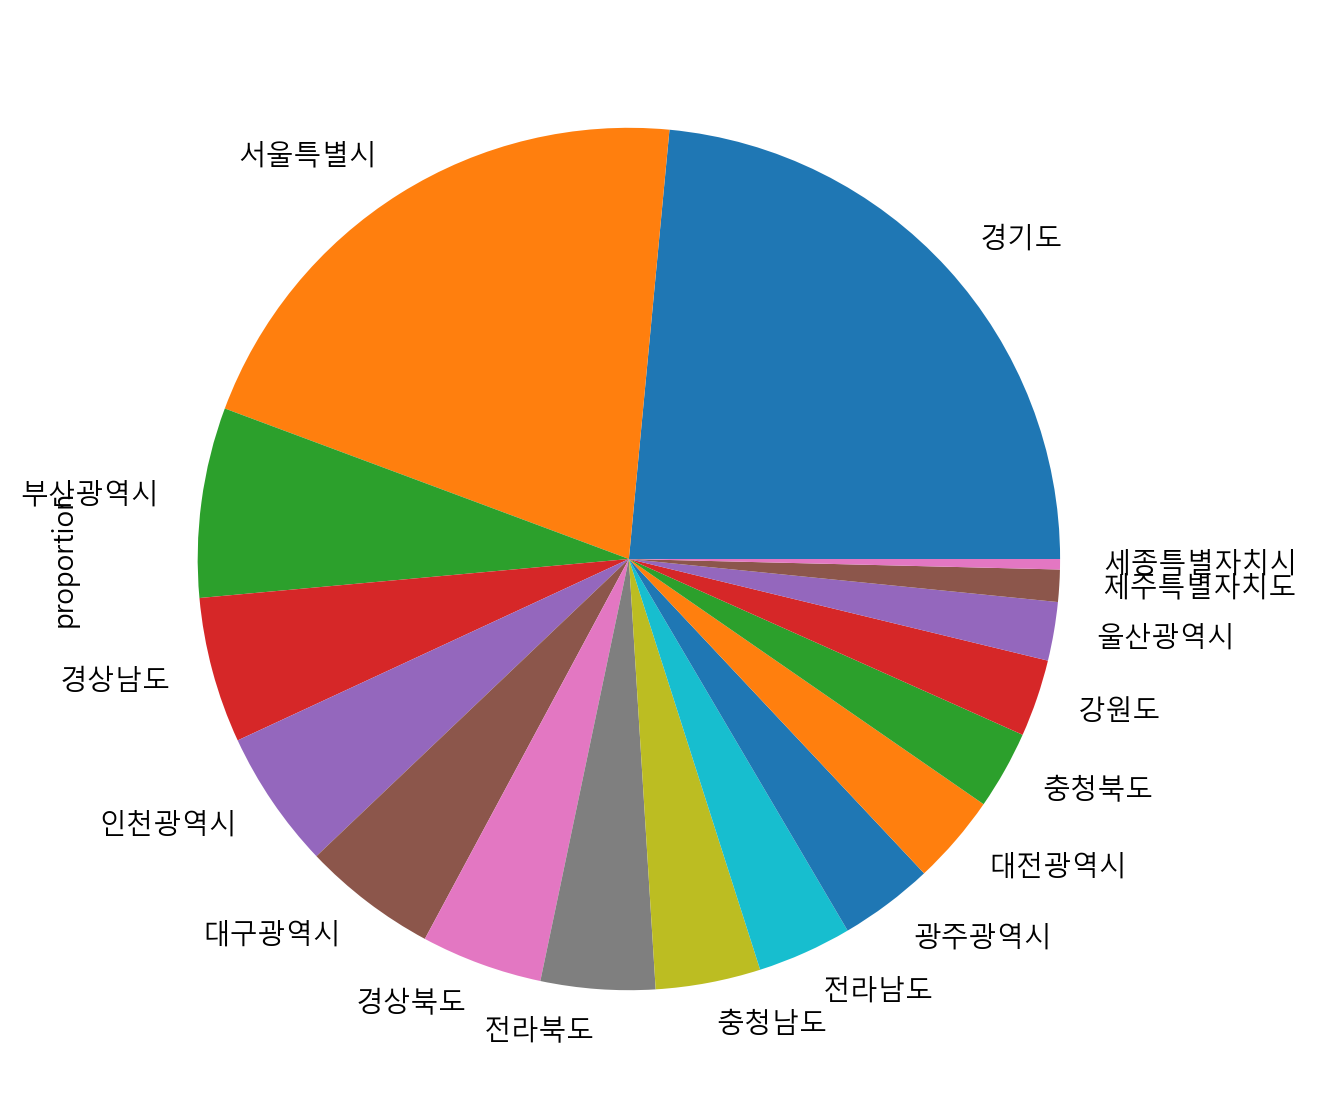

In [150]:
# 판다스의 plot.pie()를 사용해서 파이그래프를 그려봅니다.

city_normalize.plot.pie(figsize=(7, 7)) # 파이차트는 안쓰는 것이 좋다!

<Axes: xlabel='count', ylabel='시도명'>

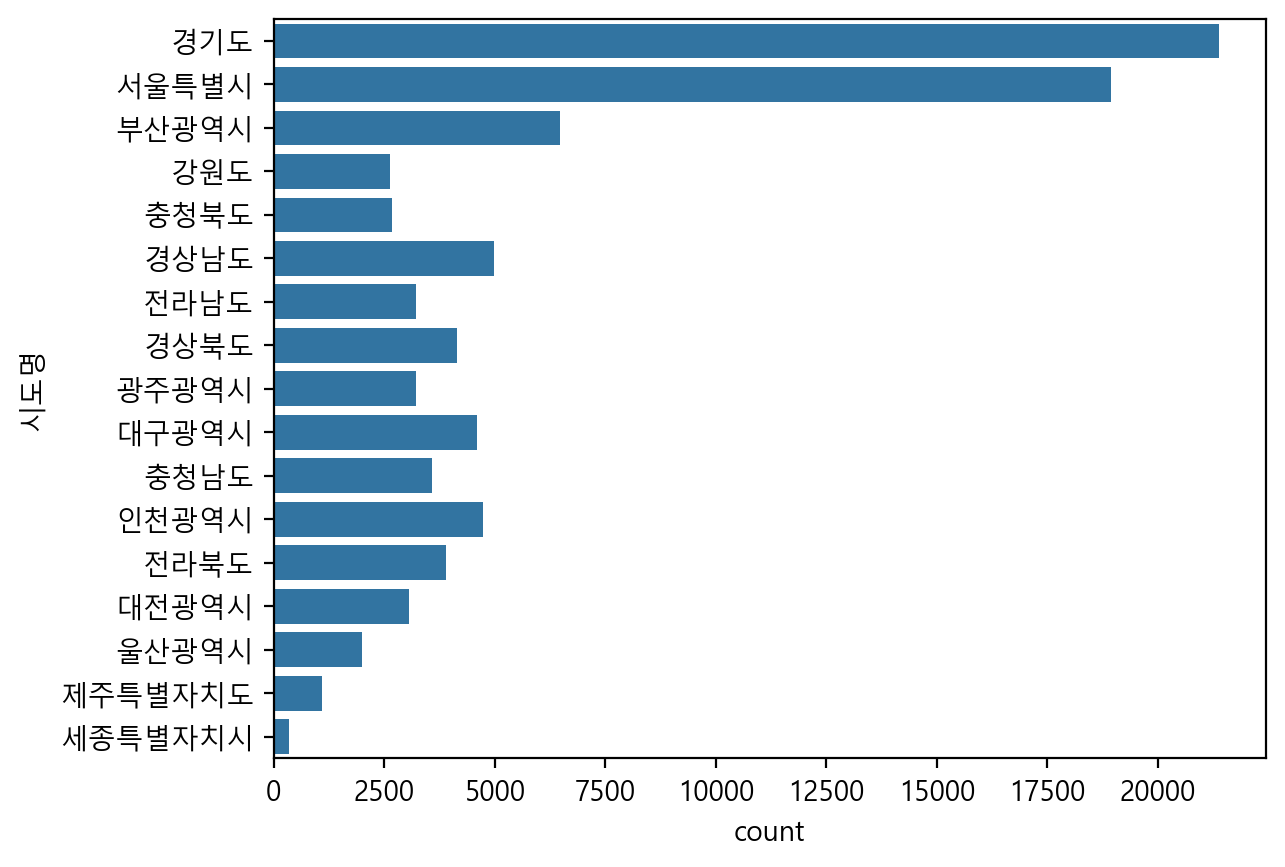

In [152]:
sns.countplot(data=df, y="시도명")

In [153]:
# "상권업종대분류명"으로 갯수를 세어봅니다.

df["상권업종대분류명"].value_counts()

상권업종대분류명
의료    91335
Name: count, dtype: int64

In [154]:
# "상권업종중분류명"으로 갯수를 세어봅니다.

df["상권업종중분류명"].value_counts()

상권업종중분류명
병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: count, dtype: int64

In [157]:
# normalize=True 를 사용해 비율을 구해봅니다.

n = df["상권업종중분류명"].value_counts(normalize=True)
n

상권업종중분류명
병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: proportion, dtype: float64

<Axes: xlabel='상권업종중분류명'>

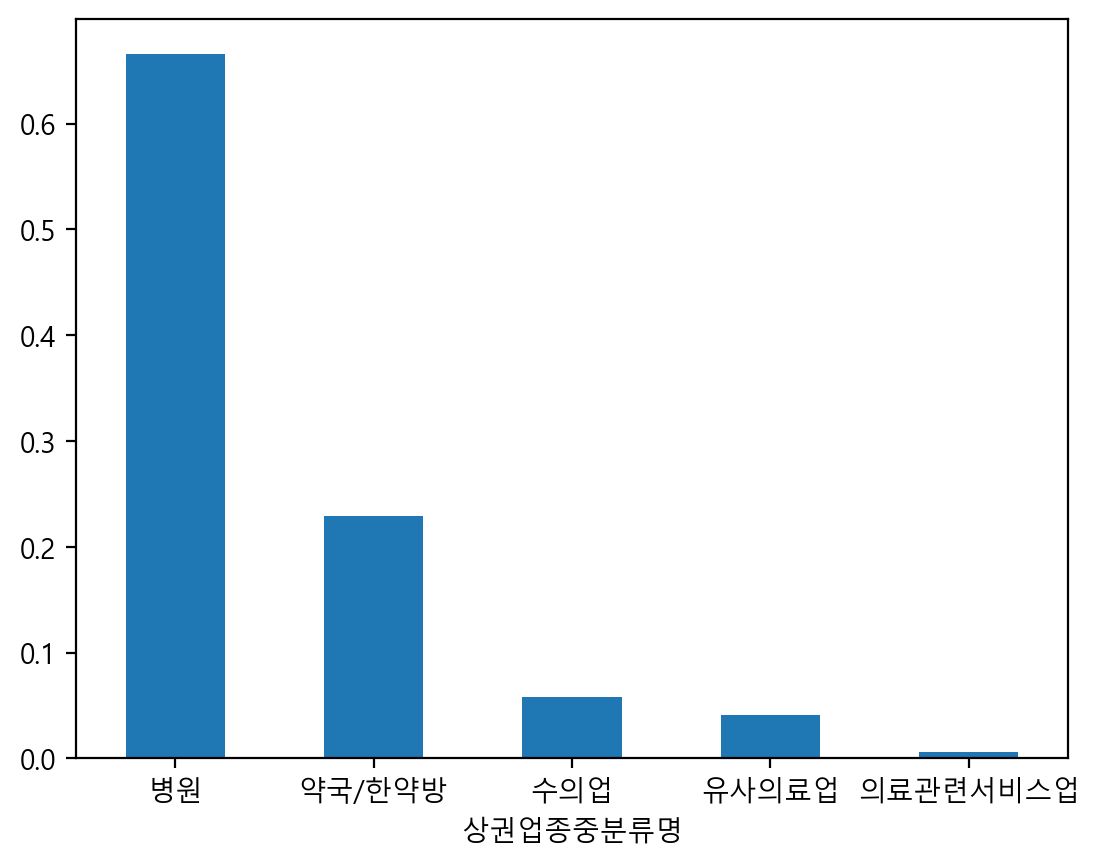

In [161]:
# 판다스의 plot.bar()를 사용해서 막대그래프를 그려봅니다.

n.plot.bar(rot=0)

<Axes: ylabel='proportion'>

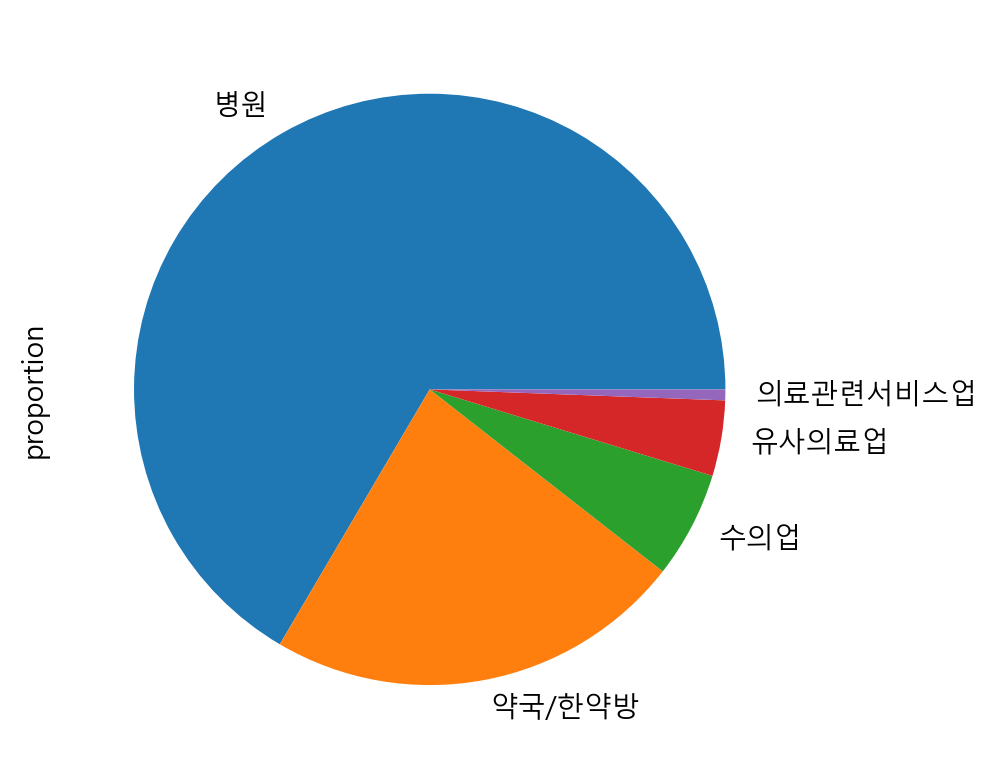

In [162]:
# 판다스의 plot.pie()를 사용해서 파이그래프를 그려봅니다.

n.plot.pie()

In [165]:
# "상권업종소분류명" 에 대한 그룹화 된 값을 카운트 합니다.

c = df["상권업종소분류명"].value_counts()
c

상권업종소분류명
약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
접골원            9
수의업-기타         9
제대혈            1
Name: count, dtype: int64

<Axes: ylabel='상권업종소분류명'>

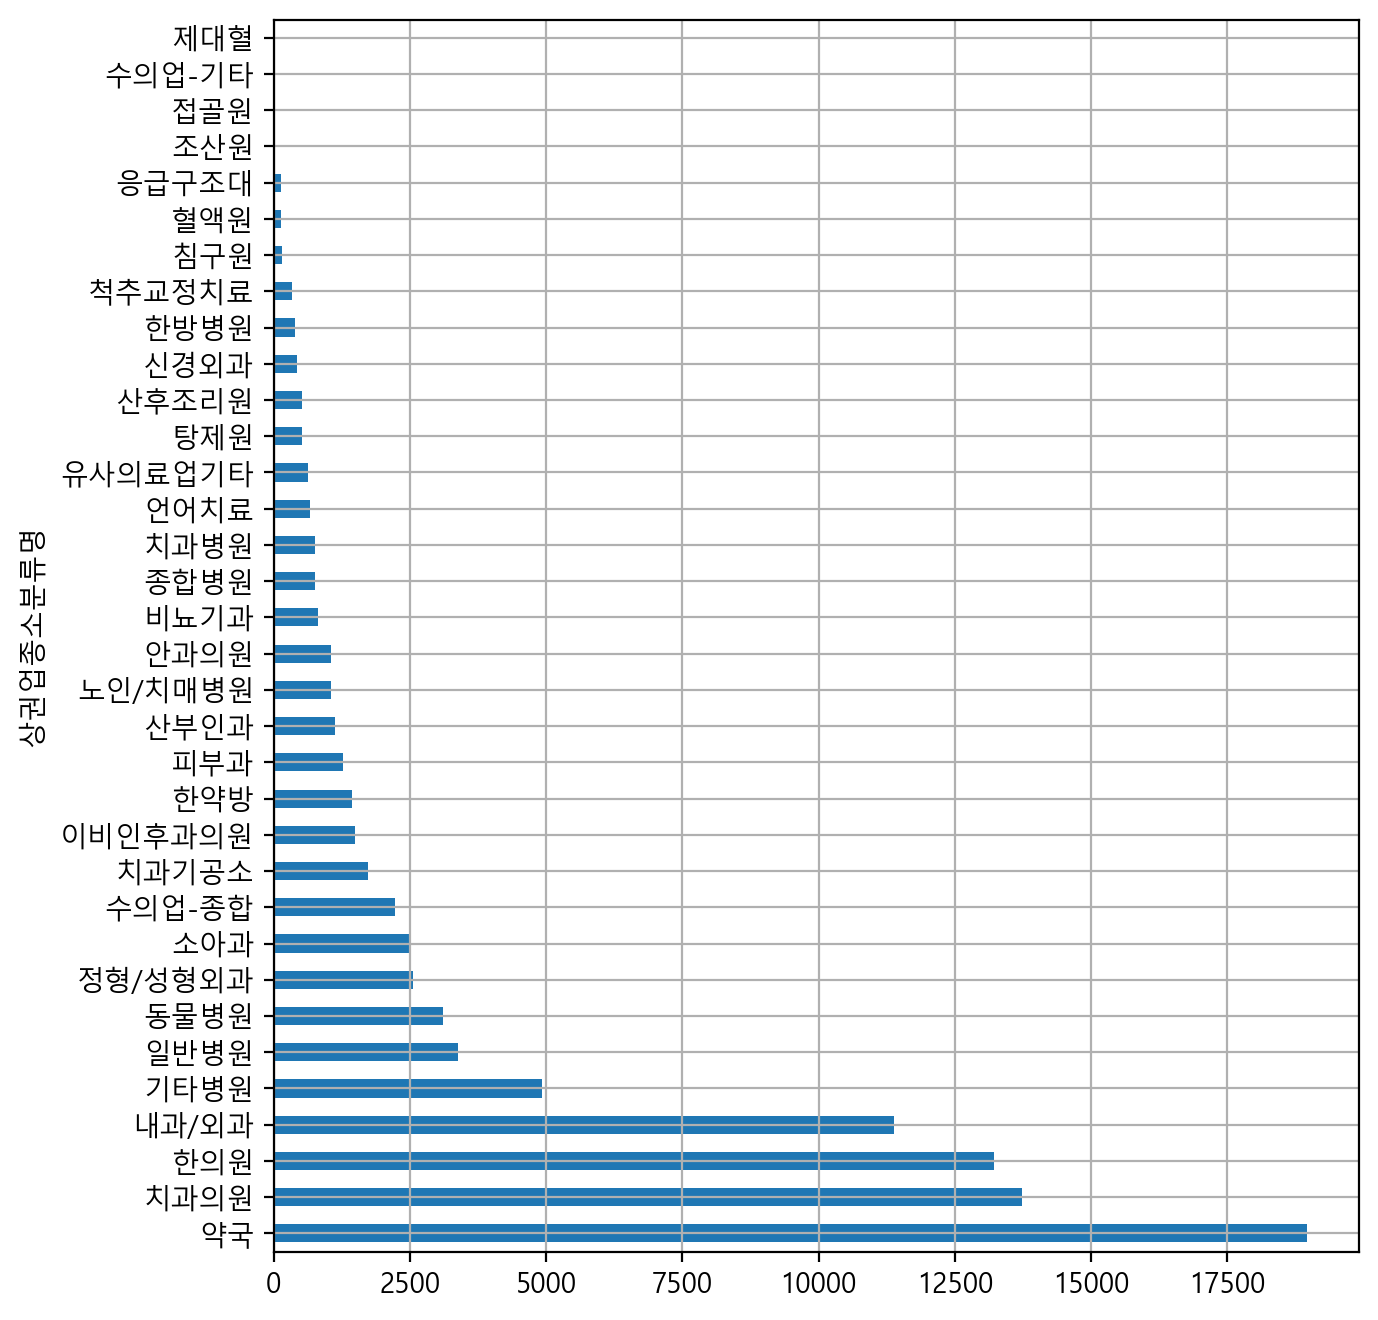

In [169]:
# "상권업종소분류명"으로 갯수를 세어봅니다.
# 판다스의 plot.bar()를 사용해서 막대그래프를 그려봅니다.

c.plot.barh(figsize=(7, 8), grid=True)

## 데이터 색인하기
* 특정 데이터만 모아서 따로 봅니다.

In [174]:
# "상권업종중분류명"이 "약국/한약방"인 데이터만 가져와서
# df_medical 이라는 변수에 담아봅니다.
# 그리고 head()를 통해 미리보기를 합니다.

df["상권업종중분류명"] == "약국/한약방"
df_medical = df[df["상권업종중분류명"] == "약국/한약방"].copy()
df_medical.head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,경기도,41465.0,...,경기도 용인시 수지구 풍덕천동 712-2,4.150000e+11,경기도 용인시 수지구 문정로,32,4.150000e+24,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528


In [181]:
# "상권업종대분류명" 에서 "의료"만 가져옵니다.
# df.loc를 사용하면 행,열을 함께 가져올 수 있습니다.
# 이 기능을 통해 "상권업종중분류명" 만 가져옵니다.
# 그리고 가져온 결과를 value_counts 를 통해 중분류의 갯수를 세어봅니다.
# shop_type

m = df["상권업종대분류명"] == "의료"
df.loc[m, "상권업종중분류명"].value_counts()


상권업종중분류명
병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: count, dtype: int64

In [ ]:
# 위와 똑같은 기능을 수행하는 코드입니다. 아래와 같이 한 줄에 표현할 수도 있습니다.
# df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"].value_counts()



In [192]:
# 유사의료업만 따로 모아봅니다.
df_medi = df[df["상권업종중분류명"] == "유사의료업"]
df_medi.shape

(3774, 29)

In [197]:
# 상호명을 그룹화해서 갯수를 세어봅니다.
# value_counts 를 사용해서 상위 10개를 출력합니다.

df["상호명"].value_counts().head(10)

상호명
리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: count, dtype: int64

In [199]:
# 유사의료업만 df_medi 변수에 담겨져 있습니다.
# df_medi 변수에서 상호명으로 갯수를 세어봅니다.
# 가장 많은 상호 상위 10개를 출력해 봅니다.

df_medi["상호명"].value_counts().head(10)

상호명
리원          32
고려수지침       22
대한적십자사      17
헌혈의집        12
고려수지침학회     10
수치과기공소      10
제일치과기공소      9
미소치과기공소      8
아트치과기공소      8
이사랑치과기공소     8
Name: count, dtype: int64

### 여러 조건으로 색인하기

In [210]:
# "상권업종소분류명"이 "약국" 인 것과
# "시도명" 이 "서울특별시"인 데이터만 가져옵니다.
# df_seoul_drug

df_seoul_drug = df[(df["상권업종소분류명"] == "약국") & (df["시도명"] == "서울특별시")] # 항상 맨 아랫줄만 출력됨! # and == & / or == \
print(df_seoul_drug.shape) # 별도로 print 함수를 사용해서 중간의 것을 출력하자!
df_seoul_drug.head(1)

(3579, 29)


,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11680.0,...,서울특별시 강남구 역삼동 821,1.170000e+11,서울특별시 강남구 테헤란로,101,1.170000e+24,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656


### 구별로 보기

In [213]:
# 위에서 색인한 데이터로 "시군구명"으로 그룹화 해서 갯수를 세어봅니다.
# 구별로 약국이 몇개가 있는지 확인해 봅니다.

c = df_seoul_drug["시군구명"].value_counts()
c.head()

시군구명
강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
Name: count, dtype: int64

In [215]:
# normalize=True 를 통해 비율을 구해봅니다.

n = df_seoul_drug["시군구명"].value_counts(normalize=True)
n.head()

시군구명
강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
Name: proportion, dtype: float64

<Axes: xlabel='시군구명'>

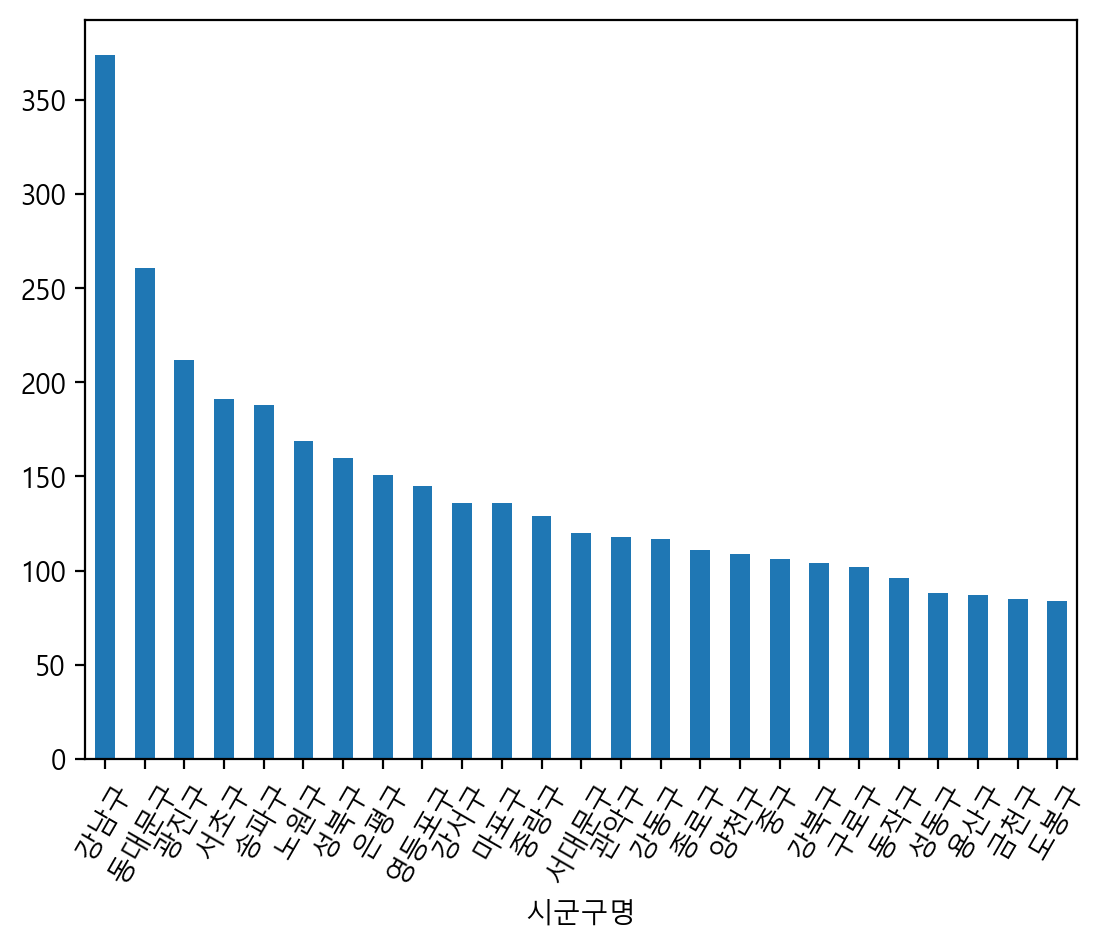

In [217]:
# 위에서 구한 결과를 판다스의 plot.bar()를 활용해 막대그래프로 그립니다.

c.plot.bar(rot=60)

In [223]:
# "상권업종소분류명"이 "종합병원" 인 것과
# "시도명" 이 "서울특별시"인 데이터만 가져옵니다.
# df_seoul_hospital

df_seoul_hospital = df[(df["상권업종소분류명"] == "종합병원") & 
                       (df["시도명"] == "서울특별시")].copy()
df_seoul_hospital

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
305,25155642,대진의료재단,S,의료,S01,병원,S01B01,종합병원,서울특별시,11215.0,...,서울특별시 광진구 중곡동 58-25,1.120000e+11,서울특별시 광진구 긴고랑로,119,1.120000e+24,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,127.088279,37.559048
353,20471487,홍익병원별관,S,의료,S01,병원,S01B01,종합병원,서울특별시,11470.0,...,서울특별시 양천구 신정동 897-13,1.150000e+11,서울특별시 양천구 국회대로,250,1.150000e+24,서울특별시 양천구 국회대로 250,158070.0,7937.0,126.862805,37.529213
385,20737057,SNUH,S,의료,S01,병원,S01B01,종합병원,서울특별시,11680.0,...,서울특별시 강남구 역삼동 736-55,1.170000e+11,서울특별시 강남구 테헤란로26길,10,1.170000e+24,서울특별시 강남구 테헤란로26길 10,135080.0,6236.0,127.035825,37.499630
1917,23210677,평화드림여의도성모병원의료기매장,S,의료,S01,병원,S01B01,종합병원,서울특별시,11560.0,...,서울특별시 영등포구 여의도동 62,1.160000e+11,서울특별시 영등포구 63로,10,1.160000e+24,서울특별시 영등포구 63로 10,150713.0,7345.0,126.936693,37.518296
2461,20024045,한양,S,의료,S01,병원,S01B01,종합병원,서울특별시,11200.0,...,서울특별시 성동구 행당동 15-1,1.120000e+11,서울특별시 성동구 마조로,22,1.120000e+24,서울특별시 성동구 마조로 22-2,133070.0,4763.0,127.041325,37.559469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71991,28505952,서울성모병원응급의료센터,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,...,서울특별시 서초구 반포동 505,1.170000e+11,서울특별시 서초구 반포대로,222,1.170000e+24,서울특별시 서초구 반포대로 222,137701.0,6591.0,127.005841,37.502382
76508,12292992,라마르의원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11740.0,...,서울특별시 강동구 천호동 453-8,1.170000e+11,서울특별시 강동구 천호대로157길,18,1.170000e+24,서울특별시 강동구 천호대로157길 18,134864.0,5335.0,127.127466,37.538485
90492,16031909,가톨릭대학교여의도성모병원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11140.0,...,서울특별시 중구 명동2가 1-1,1.110000e+11,서울특별시 중구 명동길,74,1.110000e+24,서울특별시 중구 명동길 74,100809.0,4537.0,126.986758,37.563662
90581,16332576,씨엠병원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11560.0,...,서울특별시 영등포구 영등포동4가 90,1.160000e+11,서울특별시 영등포구 영등포로36길,13,1.160000e+24,서울특별시 영등포구 영등포로36길 13,150030.0,7301.0,126.903857,37.518807


In [225]:
# "시군구명" 으로 그룹화 해서 구별로 종합병원의 수를 세어봅니다.

df_seoul_hospital["시군구명"].value_counts()

시군구명
강남구     15
영등포구     8
광진구      6
서초구      6
강동구      5
중구       5
송파구      5
강북구      4
도봉구      4
서대문구     4
양천구      4
성북구      3
강서구      2
중랑구      2
종로구      2
동대문구     2
구로구      2
노원구      2
금천구      2
성동구      2
관악구      2
동작구      1
마포구      1
용산구      1
은평구      1
Name: count, dtype: int64

### 텍스트 데이터 색인하기

In [241]:
# str.contains 를 사용해서 "상호명"에 "대학병원"이 들어가는 것을 가져와서 head()로 미리보기 합니다.

df_seoul_hospital["상호명"].str.contains("대학병원").head() # ~ == not contains

305     False
353     False
385     False
1917    False
2461    False
Name: 상호명, dtype: bool

In [242]:
# str.startswith 를 사용해 "서울"로 시작하는 도로명주소를 가져와서 head()로 미리보기 합니다.

df_seoul_hospital["상호명"].str.startswith("서울").head()

305     False
353     False
385     False
1917    False
2461    False
Name: 상호명, dtype: bool

In [244]:
# str.endswith를 사용해서 "상호명"이 "병원"으로 끝나는 데이터를 가져와서 head()로 미리보기 합니다.

df_seoul_hospital["상호명"].str.endswith("병원").head()

305     False
353     False
385     False
1917    False
2461    False
Name: 상호명, dtype: bool

<Axes: xlabel='시군구명'>

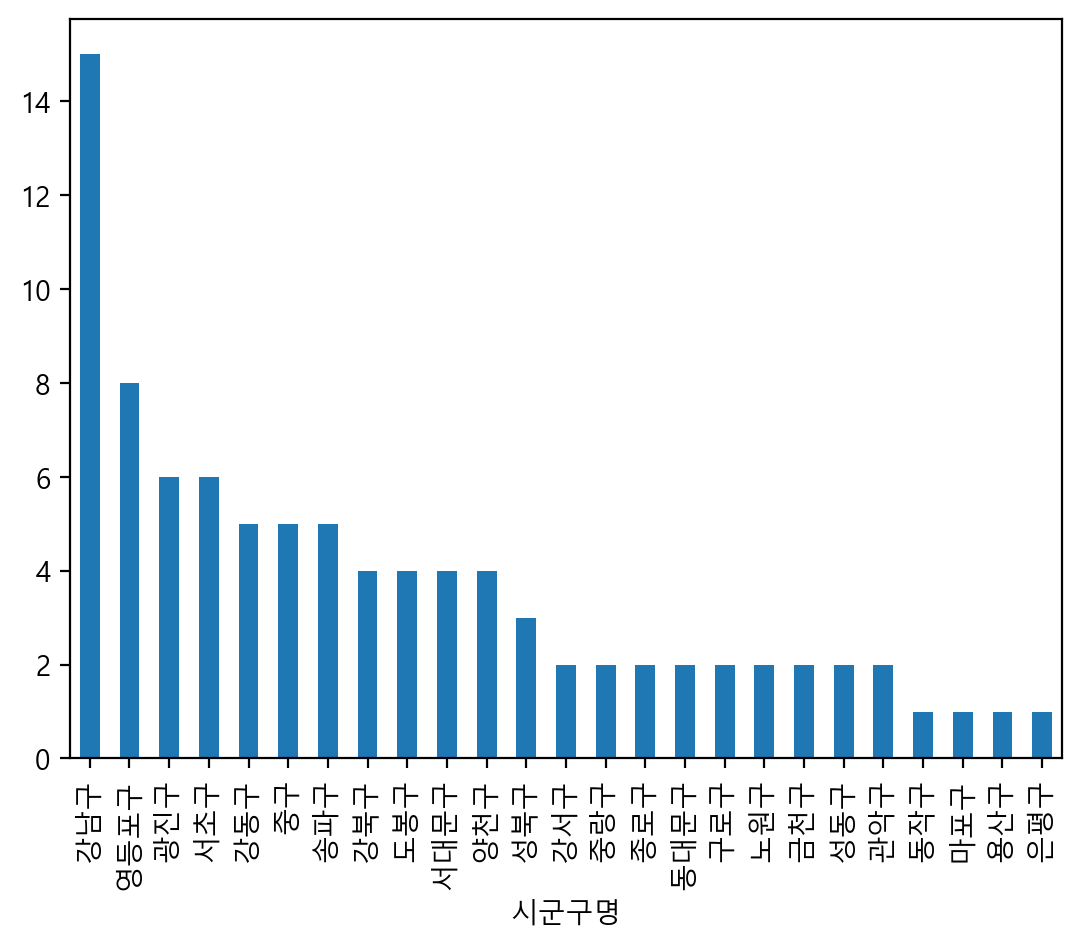

In [246]:
df_seoul_hospital["시군구명"].value_counts().plot.bar()

<Axes: xlabel='시군구명', ylabel='count'>

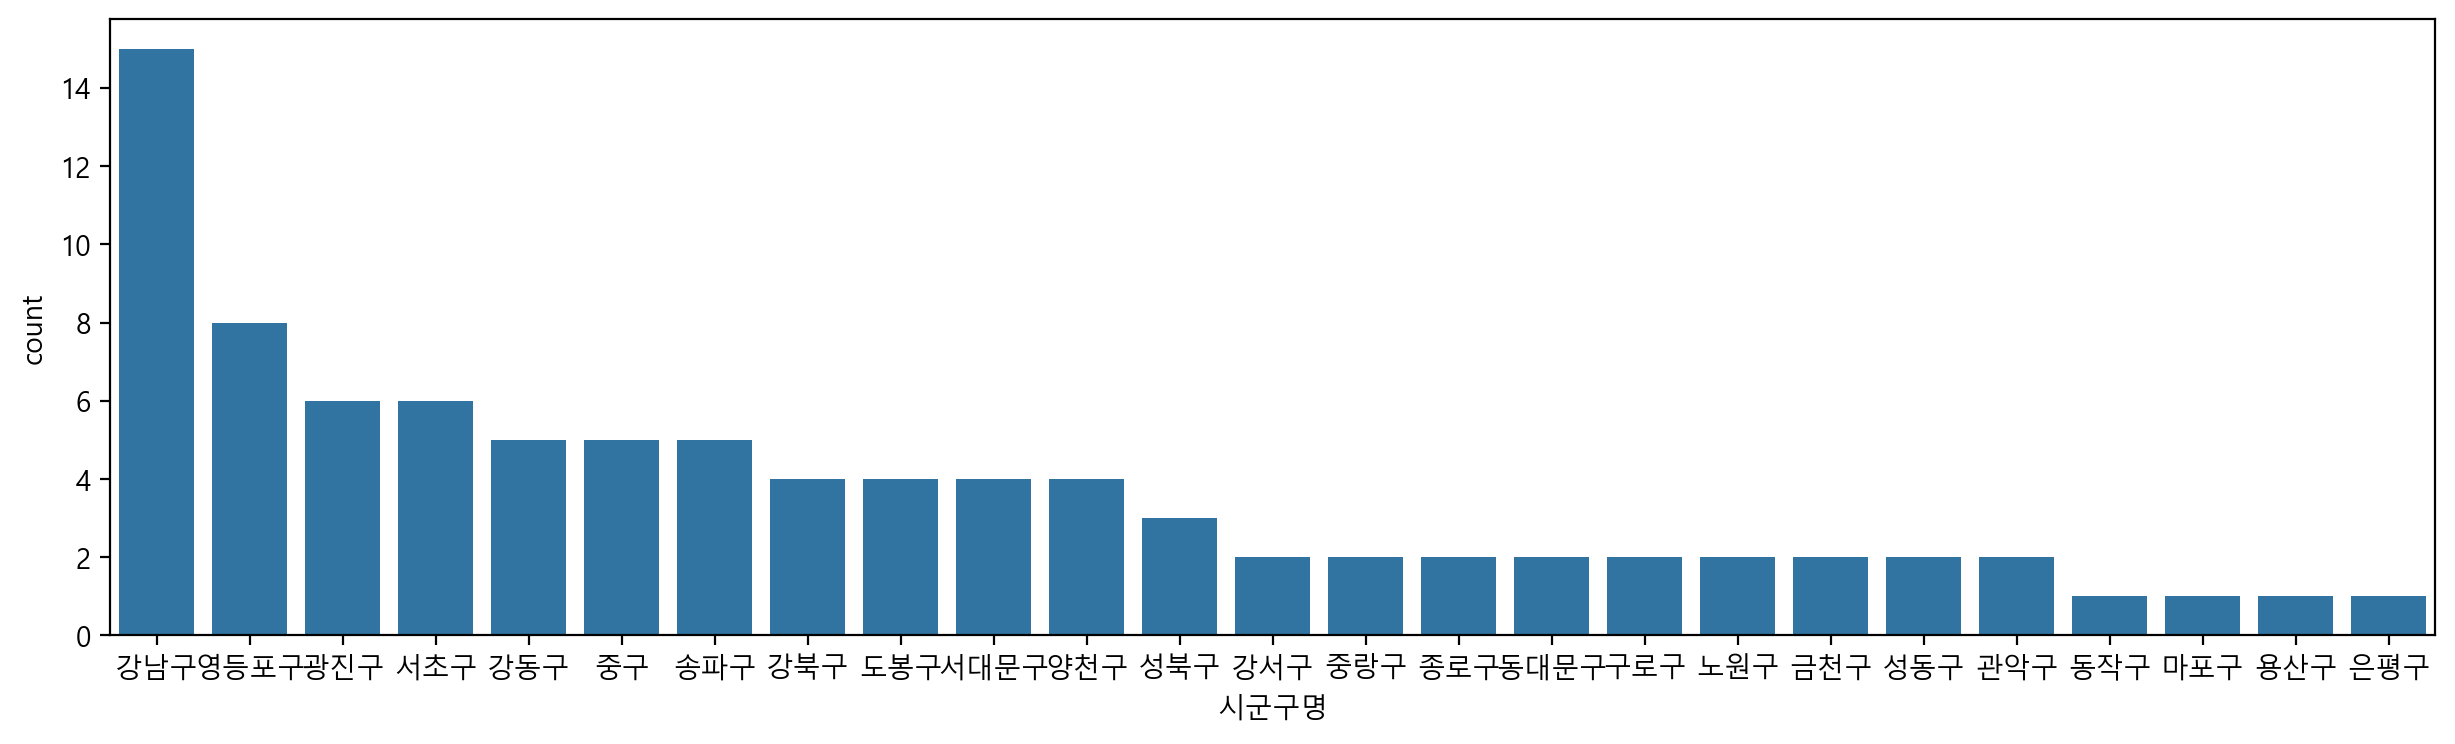

In [255]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_seoul_hospital, x="시군구명", 
                order=df_seoul_hospital["시군구명"].value_counts().index)

In [256]:
df_seoul_hospital["상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

### 특정 지역만 보기

In [261]:
# 서울에 있는 데이터의 위도와 경도를 봅니다.
# 결과를 df_seoul 이라는 데이터프레임에 저장합니다.
# 새로운 변수에 데이터프레임을 저장시 copy()를 사용합니다.
# df_seoul

df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape


(18943, 29)

<Axes: xlabel='시군구명', ylabel='count'>

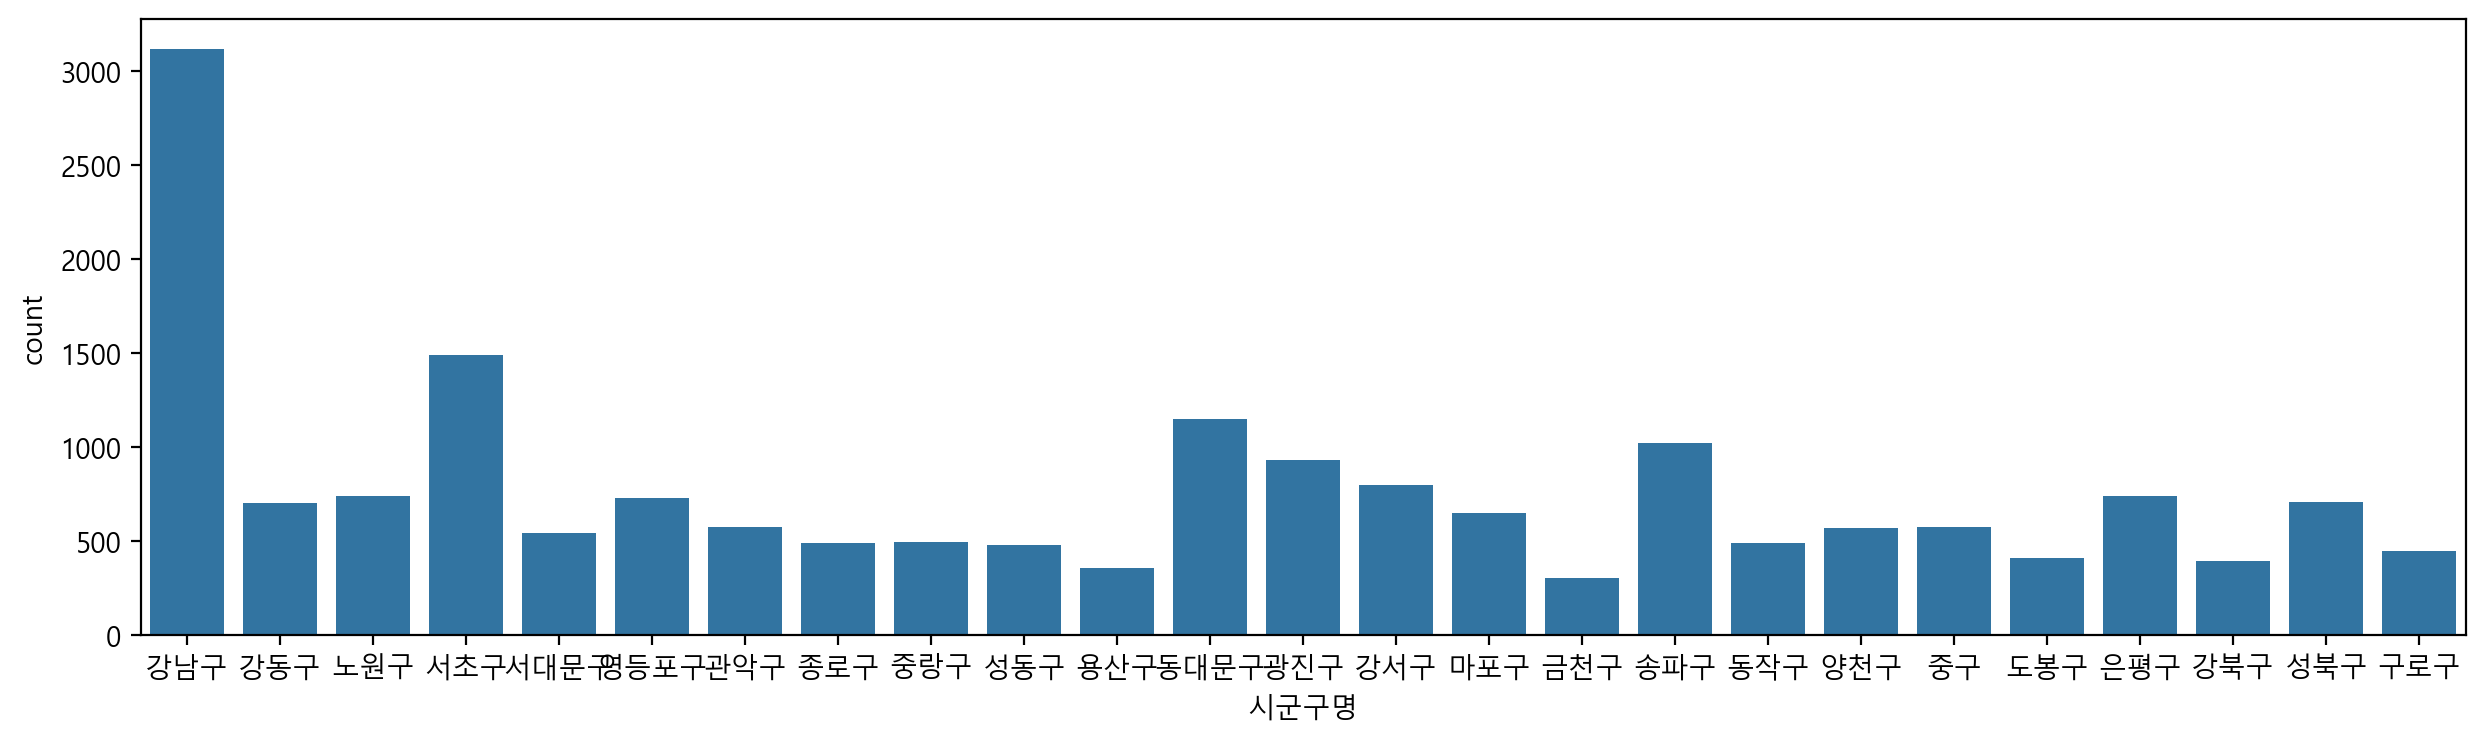

In [269]:
# seaborn 의 countplot 을 사용해서 위에서 만든 df_seoul 데이터프레임의
# 시군구명을 시각화 합니다.
plt.figure(figsize=(15, 4))
sns.countplot(data=df_seoul, x="시군구명")    

<Axes: xlabel='경도', ylabel='위도'>

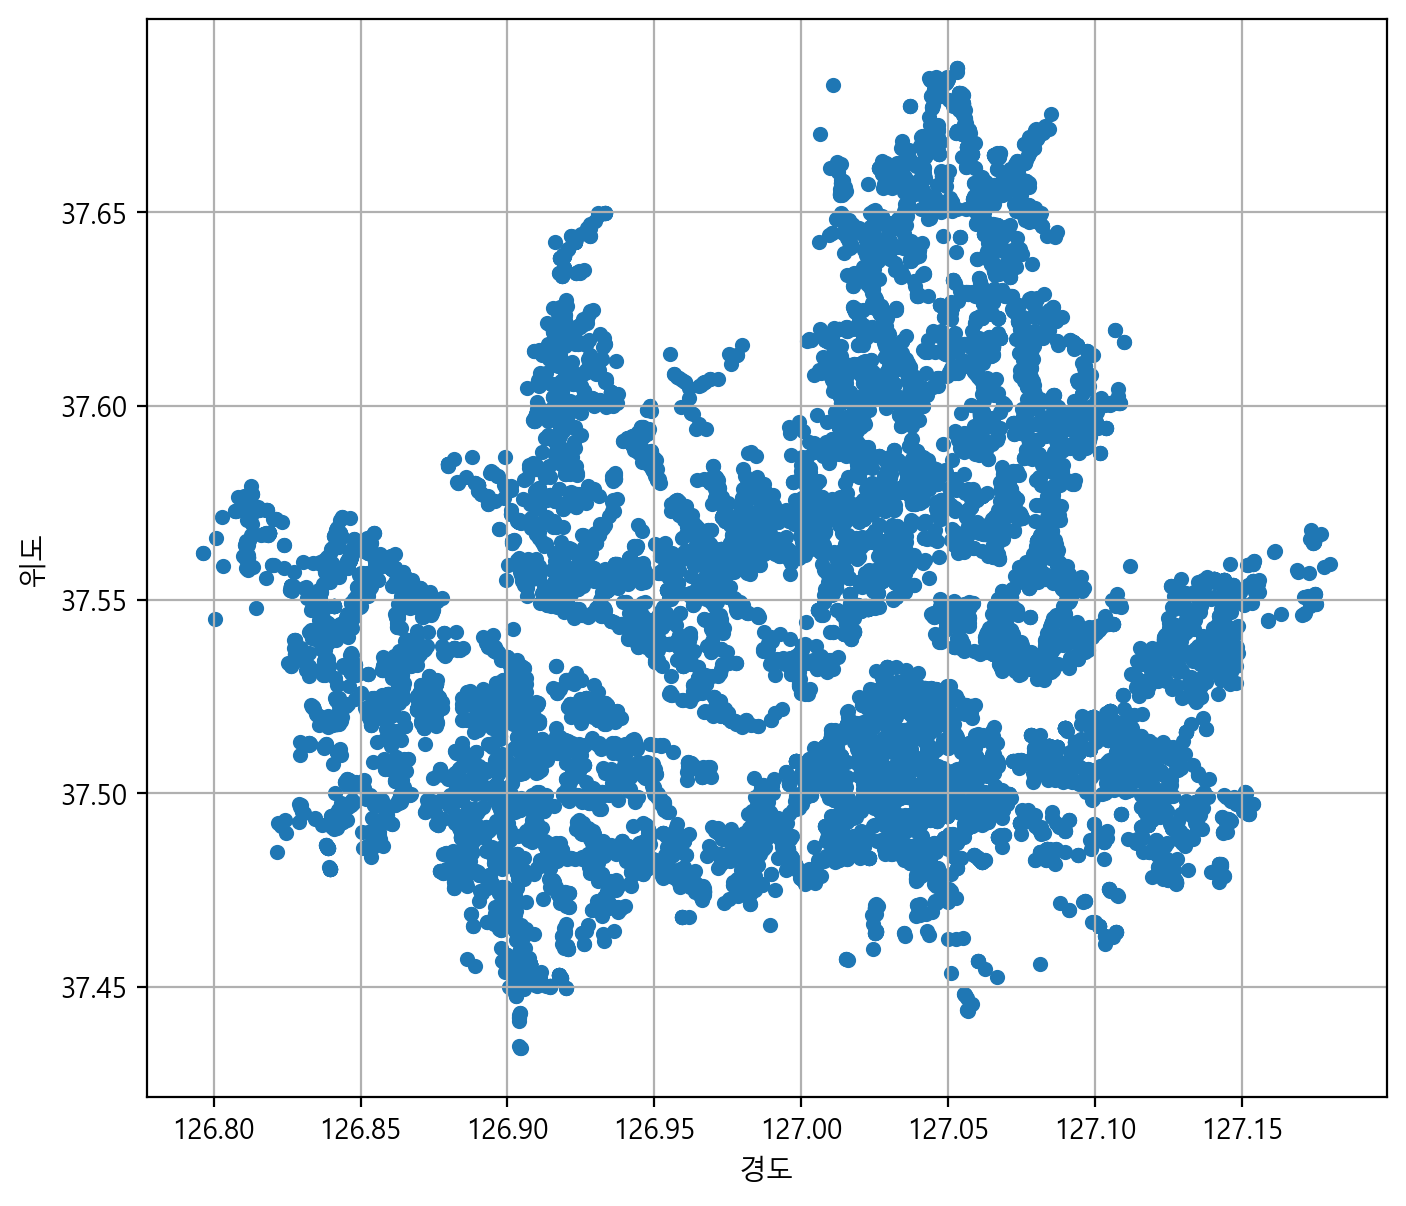

In [274]:
# Pandas 의 plot.scatter 를 통해 경도와 위도를 표시해 봅니다

df_seoul[["경도", "위도", "시군구명"]].plot.scatter(x="경도", y="위도", figsize=(8, 7), grid=True)

In [ ]:
# seaborn의 scatterplot 을 통해 구별 경도와 위도를 표시해 봅니다.
plt.figure(figsize=(16, 12))


<Axes: xlabel='경도', ylabel='위도'>

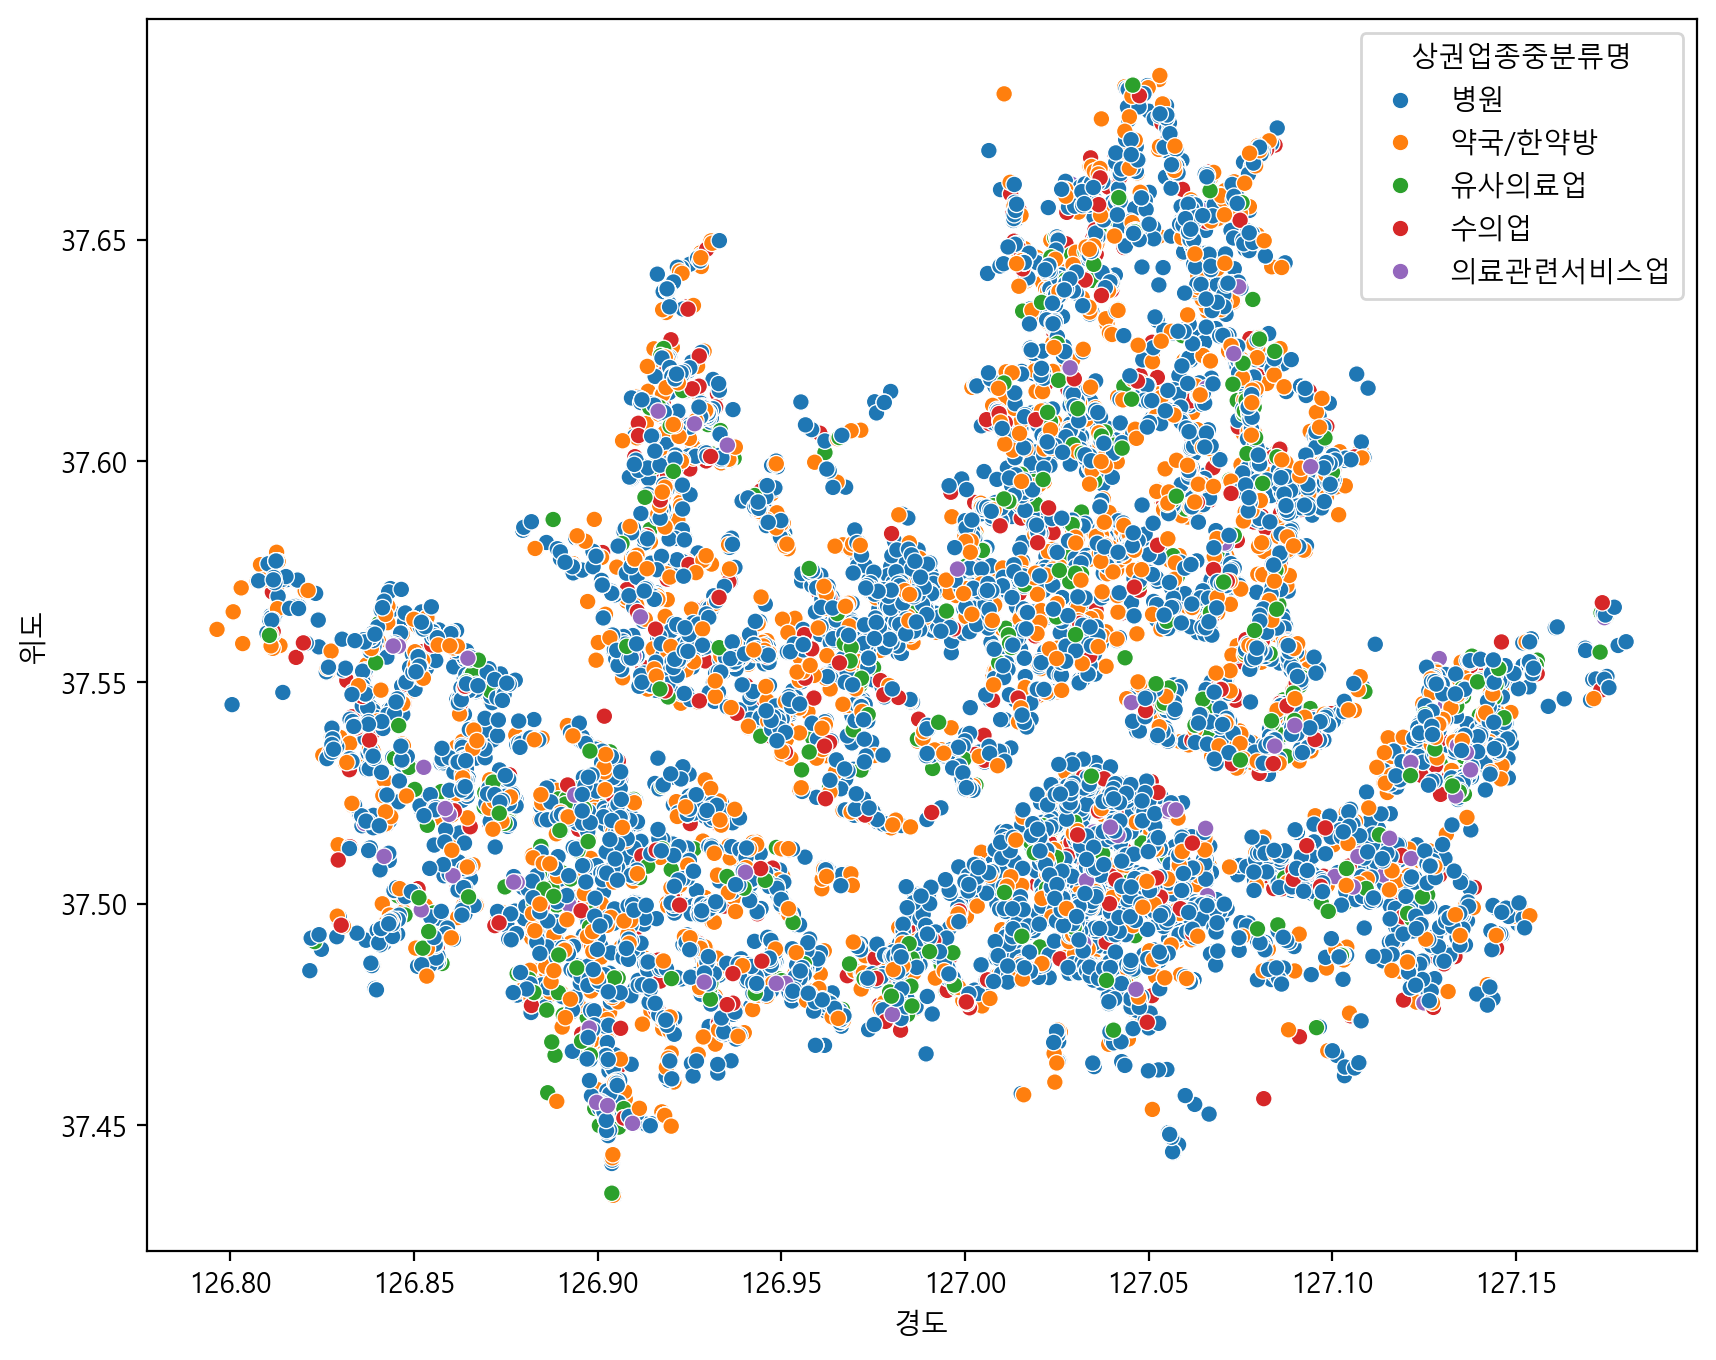

In [279]:
# seaborn의 scatterplot 을 통해 "상권업종중분류명" 경도와 위도를 표시해 봅니다.
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_seoul, x="경도", y="위도", hue="상권업종중분류명")


<Axes: xlabel='경도', ylabel='위도'>

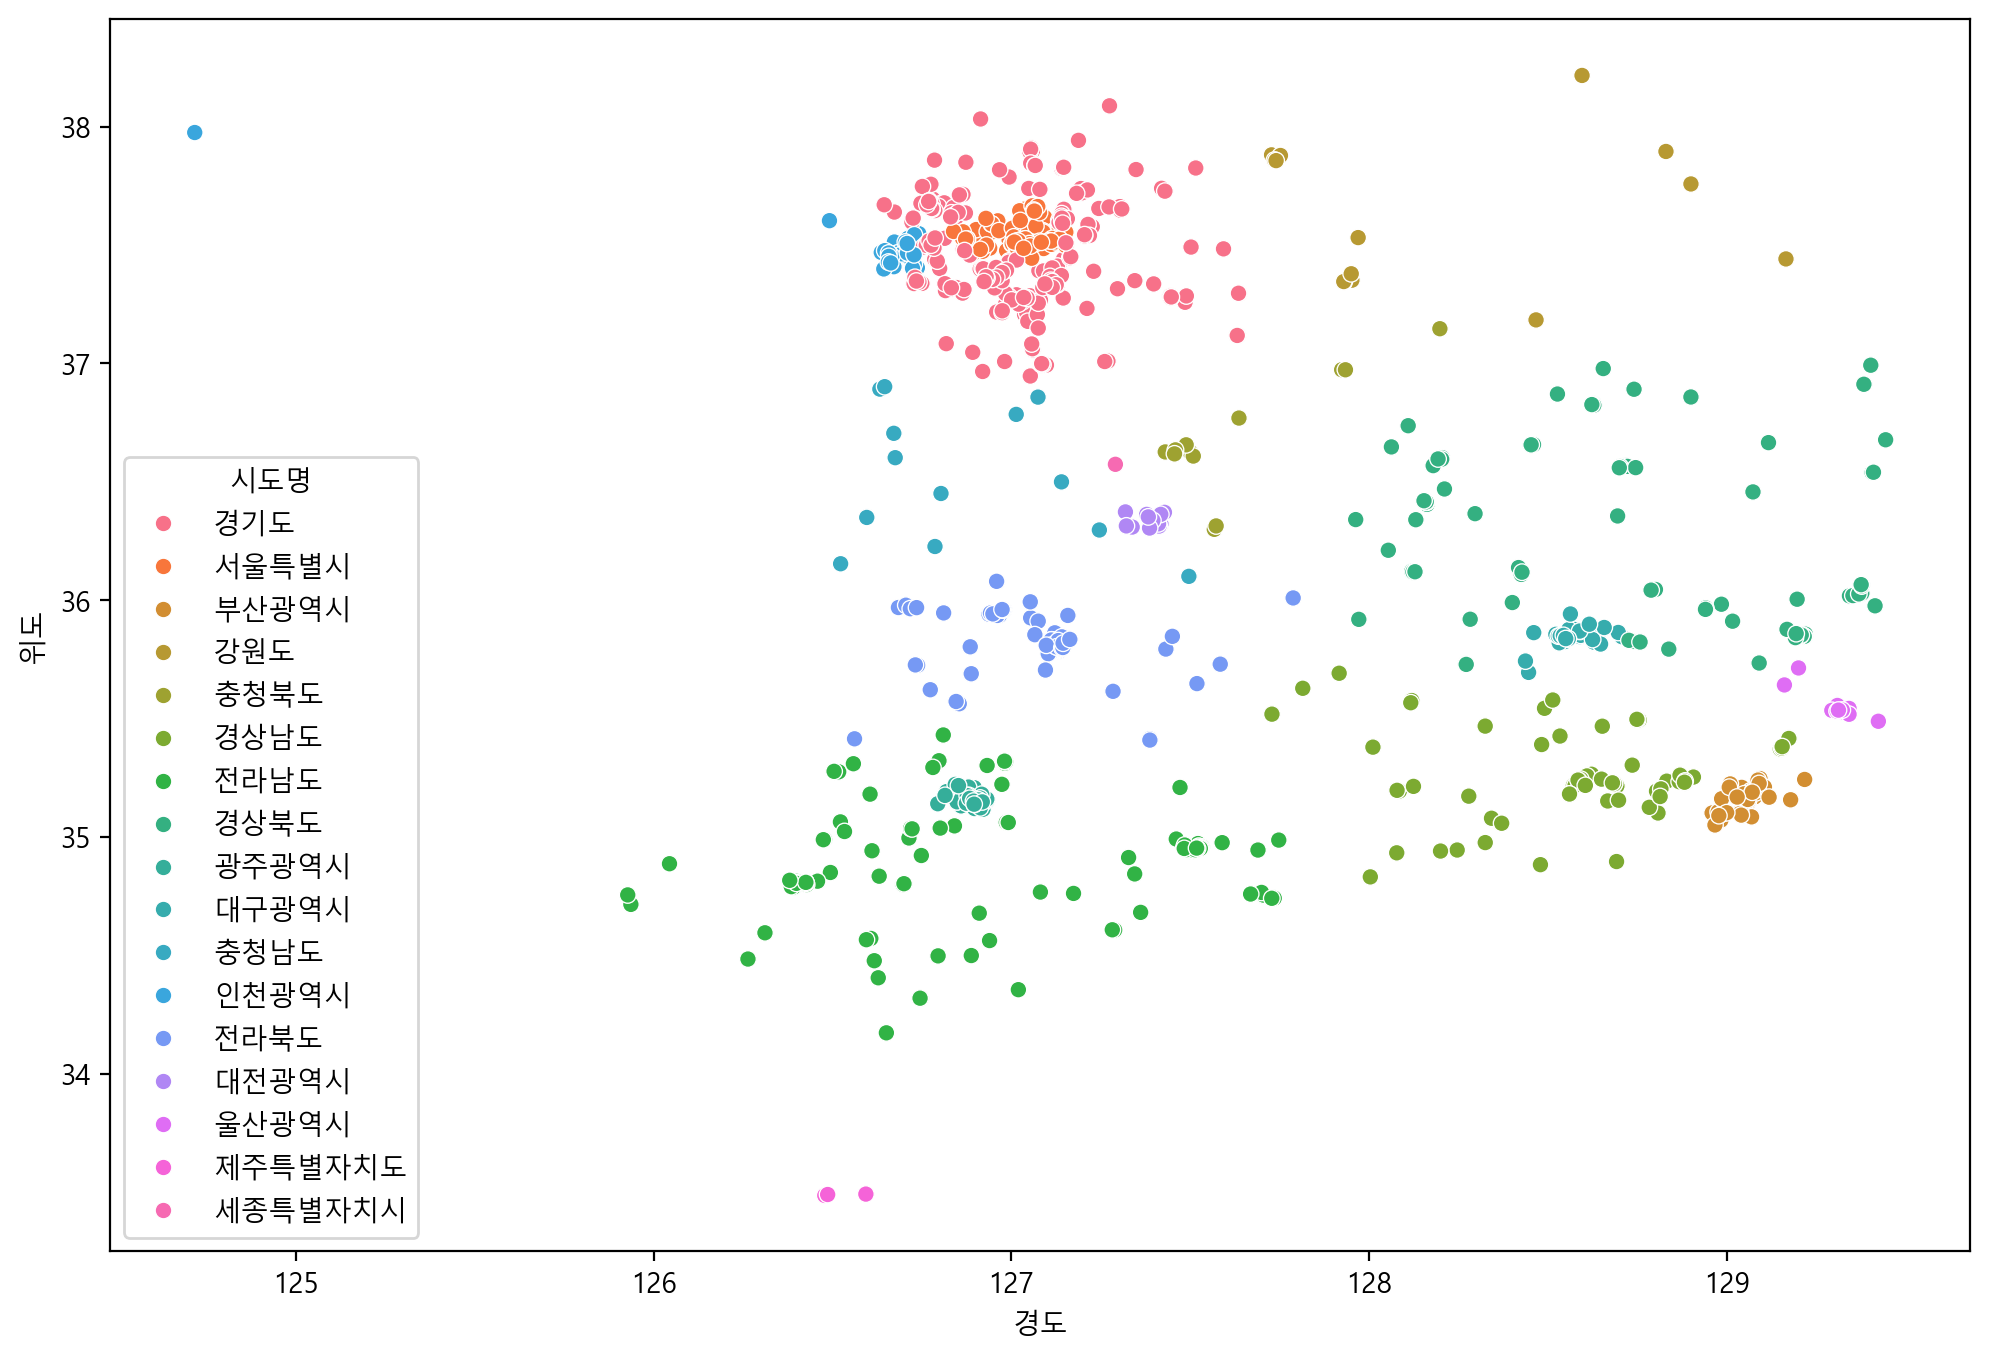

In [282]:
# seaborn의 scatterplot 을 통해 전국 데이터(df)로 구별 경도와 위도를 표시해 봅니다.
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df[:1000], x="경도", y="위도", hue="시도명")


## Folium 으로 지도 활용하기
* 다음의 프롬프트 창을 열어 conda 명령어로 설치합니다.
<img src="https://t1.daumcdn.net/cfile/tistory/99576B4A5B751DC902">

검은색 프롬프트 창에 아래 명령어를 통해 folium 을 설치합니다.


`conda install -c conda-forge folium`

### Folium 사용예제
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/main/examples/


In [284]:
# 아나콘다에서 folium 을 사용하기 위해서는 별도의 설치가 필요
# https://anaconda.org/conda-forge/folium
# conda install -c conda-forge folium
# 지도 시각화를 위한 라이브러리
conda install -c conda-forge folium

SyntaxError: invalid syntax (613945572.py, line 5)

In [ ]:
# geo_df 에 df_seoul_hospital 을 copy() 로 복사해서 할당합니다.


In [ ]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다.


## 좀 더 분석해 보기
* 상권업종중분류명, 상권업종소분류명 중에 관심 있는 분류명을 색인 후에 시도별, 시군구별 분석을 해보세요.
* 예시)
    * 언어치료는 시군구별로 어디에 많이 위치할까?
    * 의료시설은 서울과 강남에 집중되어 있을까?
    * 강남에는 피부과, 성형외과가 다른 지역에 비해 많을까?